In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Kobe Bryant  shot selection

Cсылка на соревнование: https://www.kaggle.com/c/kobe-bryant-shot-selection

Goal: Fun and education

Using 20 years of data on Kobe's swishes and misses, can you predict which shots will find the bottom of the net? This competition is well suited for practicing classification basics, feature engineering, and time series analysis. Practice got Kobe an eight-figure contract and 5 championship rings. What will it get you?

This data contains the location and circumstances of every field goal attempted by Kobe Bryant took during his 20-year career. Your task is to predict whether the basket went in (shot_made_flag).

We have removed 5000 of the shot_made_flags (represented as missing values in the csv file). These are the test set shots for which you must submit a prediction. You are provided a sample submission file with the correct shot_ids needed for a valid prediction.

In [2]:
data = pd.read_csv(r'D:\ML\Занятие 10 Feature selection\дз\kobe.csv')

In [3]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
target = 'shot_made_flag'

**Задания:**

1. Провести анализ данных. Много хороших примеров анализа можно посмотреть здесь https://www.kaggle.com/c/kobe-bryant-shot-selection/kernels
2. Подготовить фичи для обучения модели - нагенерить признаков, обработать пропущенные значения, проверить на возможные выбросы, обработать категориальные признаки и др.
3. Обучить линейную модель, Lasso, Ridge (с встроеной регуляризацией) на тех же признаках - построить сравнительную таблицу или график коэффициентов, сделать заключения о том, как меняется величина коэффициентов, какие зануляются. 

**Дополнительно**
4. Сравнить результаты на тестовом наборе данных - сделать train_test_split в самом начале, подготовить переменные, сравнить результаты работы классификаторов (те же 3), метрика ROC AUC
5. Построить PCA на подготовленных признаках, посмотреть, какие компоненты составляют наибольшую часть дисперсии целевой переменной

# Анализ данных

In [5]:
# на выбросы в данных ничего не указывает
data.describe(include = ['number'])

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


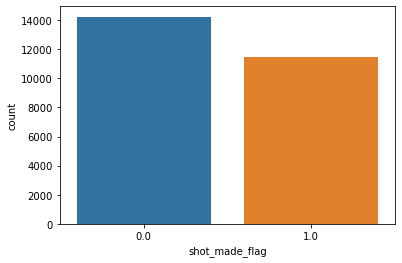

In [6]:
# посмотрим распределение таргетной переменной
ax = plt.axes()
sns.countplot("shot_made_flag", data = data, ax=ax)
plt.show()

#### Данные распределены равномерно по классам, поэтому методы сбалансирования классов не нужны.

In [7]:
data.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

In [8]:
# пропущенные значения есть в переменной shot_made_flag, которая является таргетом, поэтому будем использовать наблюдения 
# с индексами пропущенных целевых переменных для прогнозирования
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [9]:
# переменные game_event_id и game_id можно удалить из модели, так как они будут вносить шум в модель. Перменные типа object 
# переведем в тип category
data_copy = data.copy()
data_copy = data_copy.drop({'game_event_id', 'game_id'}, axis = 1)

In [10]:
# переведем переменные типа Object в тип category
vars_to_category = ['combined_shot_type', 'season', 'shot_type', 'shot_zone_area', 'shot_zone_basic', \
                   'shot_zone_range', 'team_name', 'game_date', 'matchup', 'opponent']
for col in vars_to_category:
    data_copy[col] = data_copy[col].astype('category')

In [11]:
data_copy.dtypes

action_type             object
combined_shot_type    category
lat                    float64
loc_x                    int64
loc_y                    int64
lon                    float64
minutes_remaining        int64
period                   int64
playoffs                 int64
season                category
seconds_remaining        int64
shot_distance            int64
shot_made_flag         float64
shot_type             category
shot_zone_area        category
shot_zone_basic       category
shot_zone_range       category
team_id                  int64
team_name             category
game_date             category
matchup               category
opponent              category
shot_id                  int64
dtype: object

<AxesSubplot:>

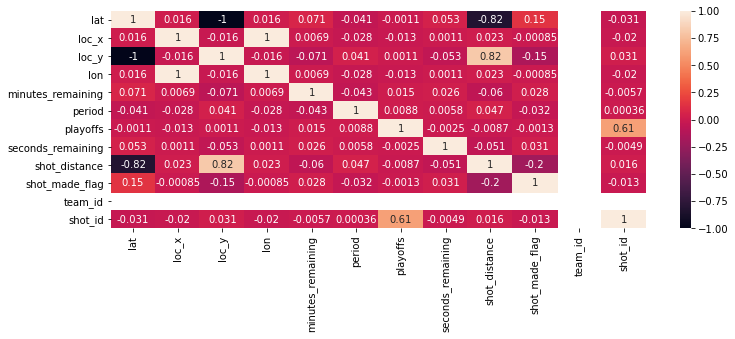

In [12]:
corr = data_copy.corr()
plt.figure(figsize=[12,4])
sns.heatmap(corr, annot=True)

In [13]:
# Переменные loc_x и lon и loc_y и lat высоко коррелированы между собой. Удалим из модели loc_x и и loc_y
data_copy = data_copy.drop({'loc_x','loc_y'}, axis = 1)

<AxesSubplot:>

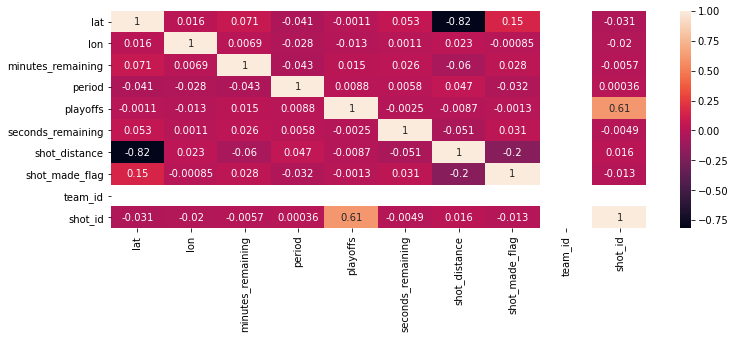

In [14]:
corr = data_copy.corr()
plt.figure(figsize=[12,4])
sns.heatmap(corr, annot=True)

In [15]:
data_copy.describe(include = ['category'])

,combined_shot_type,season,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_name,game_date,matchup,opponent
count,30697,30697,30697,30697,30697,30697,30697,30697,30697,30697
unique,6,20,2,6,7,5,1,1559,74,33
top,Jump Shot,2005-06,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,Los Angeles Lakers,2016-04-13,LAL @ SAS,SAS
freq,23485,2318,24271,13455,12625,9398,30697,50,1020,1978


In [16]:
# удалим drop-нем признак team_name, так как Kobe Bryant играл только в одной команде
data_copy = data_copy.drop({'team_name', 'team_id'}, axis = 1)

In [17]:
# поменяем тип переменной period на категориальную переменную с типа Int64
data_copy['period'] = data_copy['period'].astype('category')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

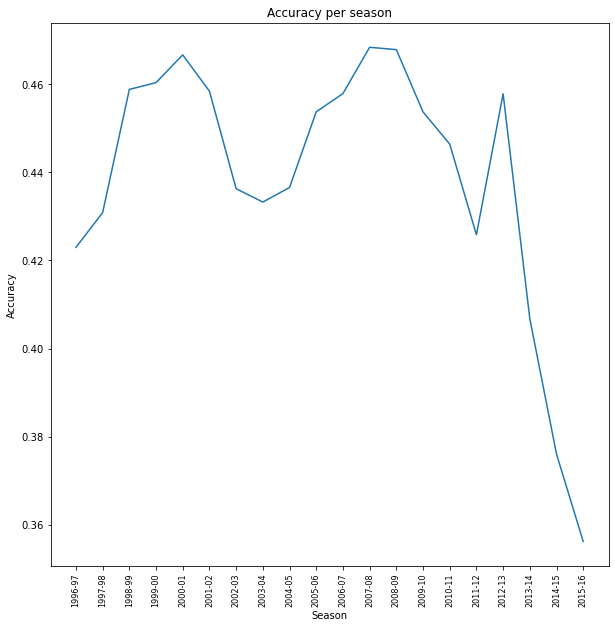

In [18]:
# посмотрим на динамику точности бросков Коби, будем считать точность, как среднее значение из количества попаданий (1) и не промахов (0)
# удалим пропущенные значения в таргетной переменной
dataset = data_copy[['season', 'shot_made_flag']].dropna()
dataset['shot_made_flag'] = pd.to_numeric(dataset['shot_made_flag'])
dataset_pivot = dataset.groupby('season').agg({'shot_made_flag':np.mean}).reset_index()

f, ax = plt.subplots(1, 1, figsize = (10,10))
sns.lineplot(x = 'season', y = 'shot_made_flag', data = dataset_pivot, ax = ax)
ax.set_title("Accuracy per season")
ax.set_xlabel("Season")
ax.set_ylabel("Accuracy")
plt.xticks(fontsize=8, rotation=90)

#### Как можно видеть из графика, последние три года карьеры Коби точность его бросков стала снижаться.

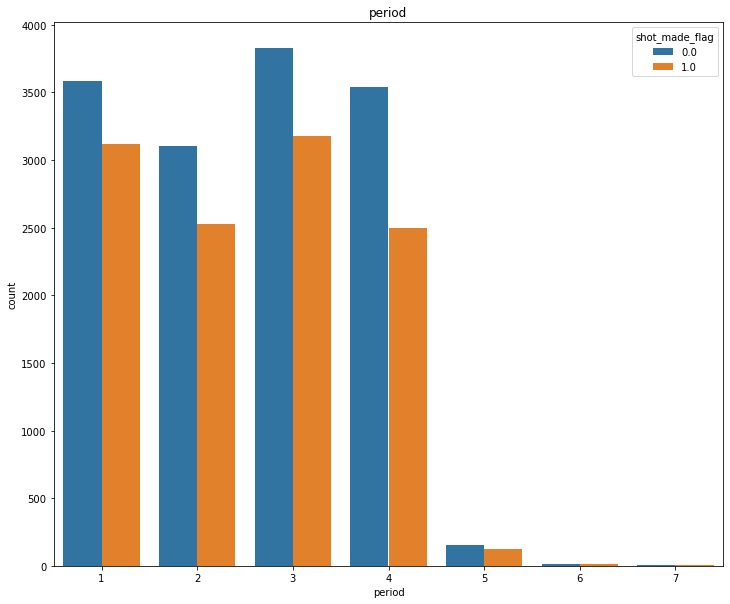

In [19]:
# так же проанализируем, распределение попаданий и промахов по периодам, 
f, ax = plt.subplots(1, figsize = (12,10))
sns.countplot( x ='period', hue="shot_made_flag", data = data_copy, ax = ax)
ax.set_title('period')
plt.show()

#### На гистограмме видно, что Коби был наиболее активен с 1-4 периоды игры. Наибольшая точность отмечается в третьем периоде. 

In [20]:
data_copy.columns

Index(['action_type', 'combined_shot_type', 'lat', 'lon', 'minutes_remaining',
       'period', 'playoffs', 'season', 'seconds_remaining', 'shot_distance',
       'shot_made_flag', 'shot_type', 'shot_zone_area', 'shot_zone_basic',
       'shot_zone_range', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

#### Далее посмотрим на переменные, которые имеют большое количество уникальных значений

In [21]:
pd.DataFrame({'counts': data_copy['action_type'].value_counts().sort_values(ascending = True)})

,counts
Cutting Finger Roll Layup Shot,1
Turnaround Fadeaway Bank Jump Shot,1
Driving Floating Bank Jump Shot,1
Running Slam Dunk Shot,1
Running Tip Shot,2
Tip Layup Shot,2
Putback Slam Dunk Shot,2
Turnaround Finger Roll Shot,2
Running Pull-Up Jump Shot,4
Running Finger Roll Shot,4


In [22]:
# как предлагают на Kaggle, можно отсечь, например, 20 команд, с которыми было сыграно меньше всего игр)
# пометим их как класс "other"
rare_comands = data_copy.value_counts().sort_values().index.values[:20]

In [23]:
data_copy.loc[data_copy['action_type'].isin(rare_comands), 'action_type'] = "other"

### Так же нужно поработать с датой

In [24]:
# Переведем game_date в формат datetime и выделим год и месяц
data_copy["game_date"] = pd.to_datetime(data_copy["game_date"])
data_copy['game_month'] = data_copy['game_date'].dt.month
data_copy['game_year'] = data_copy['game_date'].dt.year
data_copy = data_copy.drop("game_date", axis=1)

In [25]:
# создадим переменную, которая будет показывать, была ли игра домашняя или нет
data_copy["home_play"] = data_copy["matchup"].str.contains("vs").astype("int")
data_copy = data_copy.drop("matchup", axis=1)

### One hot encoding

In [26]:
pd.get_dummies(data_copy["action_type"]).add_prefix("{}#".format("action_type"))
categorial_vars = [
    'action_type', 'combined_shot_type', 'period', 'season', 'shot_type',
    'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_year',
    'game_month', 'opponent', 'lat', 'lon', 'home_play']
for var in categorial_vars:
    dummies = pd.get_dummies(data_copy[var])
    dummies = dummies.add_prefix("{}#".format(var))
    data_copy.drop(var, axis=1, inplace=True)
    data_copy = data_copy.join(dummies)

In [27]:
data_copy.columns

Index(['minutes_remaining', 'playoffs', 'seconds_remaining', 'shot_distance',
       'shot_made_flag', 'shot_id', 'action_type#Alley Oop Dunk Shot',
       'action_type#Alley Oop Layup shot',
       'action_type#Cutting Finger Roll Layup Shot',
       'action_type#Cutting Layup Shot',
       ...
       'lon#-118.0298', 'lon#-118.0288', 'lon#-118.0278', 'lon#-118.0268',
       'lon#-118.0258', 'lon#-118.0248', 'lon#-118.0238', 'lon#-118.0218',
       'home_play#0', 'home_play#1'],
      dtype='object', length=1127)

#### Пропущенные значения

In [28]:
target = data_copy['shot_made_flag']

In [29]:
# так как пропущенные значения в таргете, удалим их из обучающей выборки
missing = target.isnull()

data_submit = data_copy[missing]
X = data_copy[~missing]
Y = target[~missing]

In [30]:
X = X.drop('shot_made_flag', axis = 1)

In [31]:
print(X.shape, Y.shape)

(25697, 1126) (25697,)


### Feature Selection

In [32]:
names = X.columns
names

Index(['minutes_remaining', 'playoffs', 'seconds_remaining', 'shot_distance',
       'shot_id', 'action_type#Alley Oop Dunk Shot',
       'action_type#Alley Oop Layup shot',
       'action_type#Cutting Finger Roll Layup Shot',
       'action_type#Cutting Layup Shot', 'action_type#Driving Bank shot',
       ...
       'lon#-118.0298', 'lon#-118.0288', 'lon#-118.0278', 'lon#-118.0268',
       'lon#-118.0258', 'lon#-118.0248', 'lon#-118.0238', 'lon#-118.0218',
       'home_play#0', 'home_play#1'],
      dtype='object', length=1126)

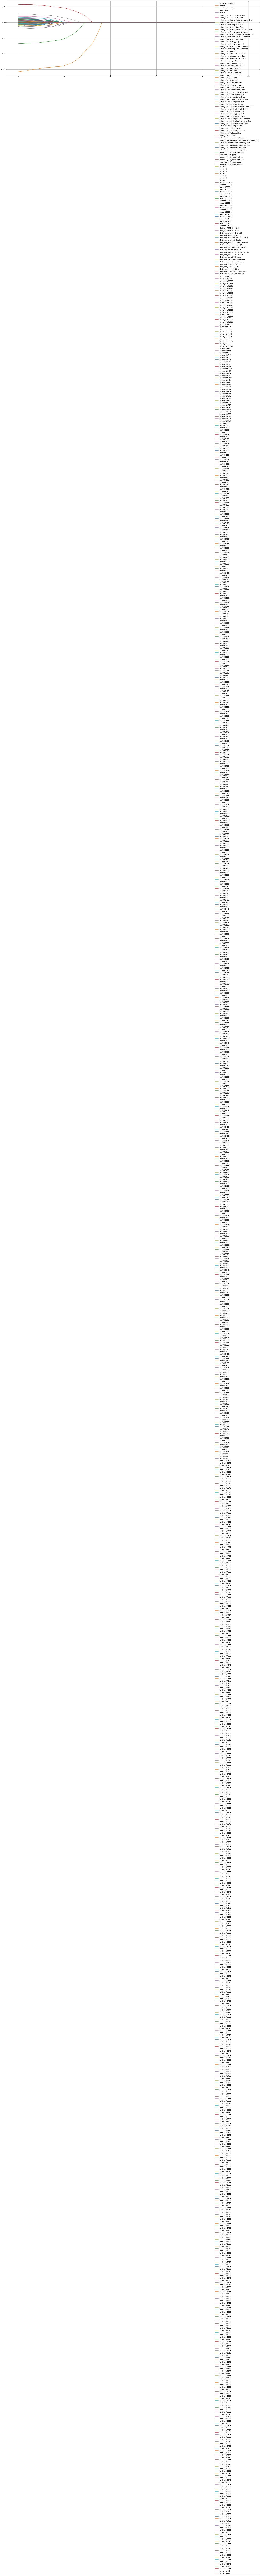

In [33]:
# проведем отбор признаков с помощью регрессии Lasso
from sklearn.linear_model import  Lasso # линейная модель с L1-регуляризацией
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

X_sc = StandardScaler().fit_transform(X) # преобразование данных
lg_l,pred_l = [], []

list_l=list(2**np.linspace(-10,10,100))

# строим n-ое кол-во моделей Лассо, меняя коэффициент регуляризации, сохраняя модель и коэффициенты
for i in range(len(list_l)):
    m_l = Lasso(alpha=list_l[i]).fit(X_sc, Y)
    lg_l.append(m_l)
    pred_l.append(m_l.coef_)

# рисуем отмасштабированные признаки на одном графике
plt.figure(figsize=(30,9))
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i)) 
plt.ylim()
plt.legend(names) 
plt.grid()

In [110]:
# Признаков слишком много, поэтому сложно ориентироваться по цветам в легенде, но примерно видим, что есть 5-8 наиболее значимых
# признаков

In [34]:
# Проведем отбор признаков с помощью PCA
from sklearn.decomposition import PCA

pca = PCA() # взяли 1 компоненту
XPCAreduced = pca.fit_transform(X_sc) # сделали трансформацию

In [35]:
explained_variance = pca.explained_variance_ratio_

In [37]:
cum_var = 0
n = 0
variance_ratio = 0.9000
for variance in explained_variance:
    while cum_var < variance_ratio:
        n += 1
        cum_var += variance
        print(f"{n} __ variance ratio: {variance:.4f} ____ общая дисперсия: {cum_var:.4f}")

1 __ variance ratio: 0.0086 ____ общая дисперсия: 0.0086
2 __ variance ratio: 0.0086 ____ общая дисперсия: 0.0172
3 __ variance ratio: 0.0086 ____ общая дисперсия: 0.0258
4 __ variance ratio: 0.0086 ____ общая дисперсия: 0.0344
5 __ variance ratio: 0.0086 ____ общая дисперсия: 0.0430
6 __ variance ratio: 0.0086 ____ общая дисперсия: 0.0516
7 __ variance ratio: 0.0086 ____ общая дисперсия: 0.0602
8 __ variance ratio: 0.0086 ____ общая дисперсия: 0.0688
9 __ variance ratio: 0.0086 ____ общая дисперсия: 0.0774
10 __ variance ratio: 0.0086 ____ общая дисперсия: 0.0860
11 __ variance ratio: 0.0086 ____ общая дисперсия: 0.0946
12 __ variance ratio: 0.0086 ____ общая дисперсия: 0.1032
13 __ variance ratio: 0.0086 ____ общая дисперсия: 0.1118
14 __ variance ratio: 0.0086 ____ общая дисперсия: 0.1204
15 __ variance ratio: 0.0086 ____ общая дисперсия: 0.1290
16 __ variance ratio: 0.0086 ____ общая дисперсия: 0.1376
17 __ variance ratio: 0.0086 ____ общая дисперсия: 0.1462
18 __ variance ratio: 0

#### Таким образом, мы можем оставить 106 главных компонент, сократив размерность с 1127 фичей до 105.

### Построим модель логистической регресии

In [38]:
(Y.index).to_list

<bound method IndexOpsMixin.tolist of Int64Index([    1,     2,     3,     4,     5,     6,     8,     9,    10,
               11,
            ...
            30685, 30687, 30688, 30689, 30690, 30691, 30692, 30694, 30695,
            30696],
           dtype='int64', length=25697)>

In [39]:
X_pca = pd.DataFrame(XPCAreduced[:,:106], index = Y.index)
X_pca

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
1,0.485828,-2.064758,0.331030,-1.309417,0.614519,1.144896,1.174049,2.306514,0.745265,-1.429588,...,1.077879,0.954313,-0.903107,-0.030397,1.389193,-1.174227,-0.358708,0.807810,-1.142225,0.971952
2,1.579492,-2.028002,0.108969,-1.792020,0.927273,-0.251286,0.789007,3.411374,-0.183587,-0.359439,...,-0.431883,0.391504,1.165637,-0.254670,-0.819317,-0.867125,1.036034,0.888239,-2.002734,0.558312
3,1.859247,-1.773580,0.105777,-2.228000,1.737235,-0.321980,1.530591,3.728759,-0.355428,0.577590,...,0.955657,0.056570,-1.208998,-0.280211,0.850030,-1.427755,-0.038377,-0.712768,-0.222540,0.169212
4,-5.456697,1.297617,0.277040,-1.608230,0.865110,0.998237,1.184293,2.824722,0.509675,-0.722766,...,0.106273,-0.393964,0.094912,0.220528,0.809082,-0.056659,0.185942,-0.516924,-0.677025,0.729775
5,1.291973,-2.369714,0.682906,-1.598805,-0.279605,1.446957,1.640243,0.863880,1.769273,-1.384714,...,-1.455338,2.363630,-0.675015,-0.756142,1.174256,-1.221672,1.299835,-0.192115,-1.294475,4.911925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30691,-5.480387,1.416643,0.385998,1.626558,4.251181,1.061271,0.249033,0.386165,0.278613,0.580277,...,-0.095779,0.135968,-0.187795,-0.324923,-0.265812,-0.384447,-0.696758,-0.275328,0.067581,-0.124949
30692,-1.100741,-0.965509,0.652531,3.592800,2.574763,4.099687,-0.414353,0.703632,-1.652960,1.019707,...,0.488747,0.725372,-0.077587,-0.938421,0.236832,-0.423478,0.011009,0.395672,0.053411,0.019871
30694,1.429511,-1.744336,0.451004,1.088414,5.417170,1.908880,0.478903,1.093907,-1.572902,0.193500,...,-0.162618,-0.787125,-1.986939,0.884676,0.289378,-0.990810,-1.311175,0.001924,-0.706994,-0.331180
30695,2.415436,3.795759,0.117115,3.549019,3.614060,4.249260,0.529429,0.572295,-1.631342,0.666751,...,0.495806,-0.036240,-0.099651,2.384827,-2.122653,2.062944,0.348599,-0.210821,2.622096,-0.699929


In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_pca, Y)

LogisticRegression()

In [41]:
model.score(X_pca,Y)

0.6445110324162353

In [42]:
log_coef = model.coef_

#### Построим регрессию Lasso

In [43]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso_reg = Lasso()
lasso_params = {
    'alpha': np.logspace(-7, 2, 100)
}
grid_lasso = GridSearchCV(lasso_reg, lasso_params, cv=10, verbose=2, n_jobs=-1)
grid_lasso.fit(X_pca, Y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   38.5s finished


GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-07, 1.23284674e-07, 1.51991108e-07, 1.87381742e-07,
       2.31012970e-07, 2.84803587e-07, 3.51119173e-07, 4.32876128e-07,
       5.33669923e-07, 6.57933225e-07, 8.11130831e-07, 1.00000000e-06,
       1.23284674e-06, 1.51991108e-06, 1.87381742e-06, 2.31012970e-06,
       2.84803587e-06, 3.51119173e-06, 4.3287...
       8.11130831e-01, 1.00000000e+00, 1.23284674e+00, 1.51991108e+00,
       1.87381742e+00, 2.31012970e+00, 2.84803587e+00, 3.51119173e+00,
       4.32876128e+00, 5.33669923e+00, 6.57933225e+00, 8.11130831e+00,
       1.00000000e+01, 1.23284674e+01, 1.51991108e+01, 1.87381742e+01,
       2.31012970e+01, 2.84803587e+01, 3.51119173e+01, 4.32876128e+01,
       5.33669923e+01, 6.57933225e+01, 8.11130831e+01, 1.00000000e+02])},
             verbose=2)

In [44]:
print(grid_lasso.best_params_)
print(grid_lasso.best_score_)

{'alpha': 0.004328761281083062}
0.08207684003049888


In [45]:
lasso_coef = grid_lasso.best_estimator_.coef_

### Построим ридж-регрессию

In [47]:
from sklearn.linear_model import Ridge
rige_reg = Ridge()
rige_params = {
    'alpha': np.logspace(-7, 2, 100),
    'solver': ['svd']
}
grid_ridge = GridSearchCV(rige_reg, rige_params, cv=10, verbose=2, n_jobs=-1)
grid_ridge.fit(X_pca, Y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.9min finished


GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-07, 1.23284674e-07, 1.51991108e-07, 1.87381742e-07,
       2.31012970e-07, 2.84803587e-07, 3.51119173e-07, 4.32876128e-07,
       5.33669923e-07, 6.57933225e-07, 8.11130831e-07, 1.00000000e-06,
       1.23284674e-06, 1.51991108e-06, 1.87381742e-06, 2.31012970e-06,
       2.84803587e-06, 3.51119173e-06, 4.3287...
       8.11130831e-01, 1.00000000e+00, 1.23284674e+00, 1.51991108e+00,
       1.87381742e+00, 2.31012970e+00, 2.84803587e+00, 3.51119173e+00,
       4.32876128e+00, 5.33669923e+00, 6.57933225e+00, 8.11130831e+00,
       1.00000000e+01, 1.23284674e+01, 1.51991108e+01, 1.87381742e+01,
       2.31012970e+01, 2.84803587e+01, 3.51119173e+01, 4.32876128e+01,
       5.33669923e+01, 6.57933225e+01, 8.11130831e+01, 1.00000000e+02]),
                         'solver': ['svd']},
             verbose=2)

In [48]:
print(grid_ridge.best_params_)
print(grid_ridge.best_score_)

{'alpha': 100.0, 'solver': 'svd'}
0.03946402738827211


In [49]:
ridge_coef = grid_ridge.best_estimator_.coef_

In [50]:
compare = pd.DataFrame(lasso_coef, columns = ['Lasso_coef'])

In [51]:
compare['ridge_coef'] = ridge_coef

In [52]:
compare['logistic_coef'] = np.hstack(log_coef)

In [53]:
compare

,Lasso_coef,ridge_coef,logistic_coef
0,-0.034499,-0.034938,-0.168284
1,-0.003791,-0.004576,-0.024502
2,-0.005943,-0.007027,-0.107495
3,0.000159,0.001343,-0.003515
4,-0.001791,-0.003189,-0.004042
...,...,...,...
101,0.007198,0.010616,0.049050
102,-0.000000,-0.002331,-0.008742
103,0.000000,0.001718,0.009504
104,-0.001667,-0.005109,-0.025473


### Мы получили таблицу с коэффициентами трех видов классификаторов, для того чтобы определить их статистическую значимость проведем тест Стьюдента. H0: коэффициент при регрессоре равен нулю H1: коэффициент при регрессоре не равен нулю

In [112]:
# Для логистической регрессии
MSE = np.mean((Y - model.predict(X_pca).T)**2)
var_est = MSE * np.diag(np.linalg.pinv(np.dot(X_pca.T,X_pca)))
SE_est = np.sqrt(var_est)

In [114]:
f = []
log = []
t = 3.319
for i,j in zip(np.hstack(log_coef), SE_est):
    d = i / j
    f.append(d)
    if d > t:
        log.append(True) # нулевая гипотеза отвергается, коэффициент статистически значим
    else:
        log.append(False) # нулевая гипотеза не отвергается, коэффициент равен нулю

In [73]:
# Для регрессии lasso
MSE = np.mean((Y - grid_lasso.predict(X_pca).T)**2)
var_est = MSE * np.diag(np.linalg.pinv(np.dot(X_pca.T,X_pca)))
SE_est = np.sqrt(var_est)

In [87]:
f = []
lasso = []
t = 3.319
for i,j in zip(np.hstack(lasso_coef), SE_est):
    d = i / j
    f.append(d)
    if d > t:
        lasso.append(True)
    else:
        lasso.append(False)

In [77]:
# Для ridge - регрессии
MSE = np.mean((Y - grid_ridge.predict(X_pca).T)**2)
var_est = MSE * np.diag(np.linalg.pinv(np.dot(X_pca.T,X_pca)))
SE_est = np.sqrt(var_est)

In [89]:
f = []
ridge = []
t = 3.319
for i,j in zip(np.hstack(ridge_coef), SE_est):
    d = i / j
    f.append(d)
    if d > t:
        ridge.append(True)
    else:
        ridge.append(False)

In [91]:
compare_2 = pd.DataFrame(log, columns = ['Logistic'])
compare_2['Lasso'] = lasso
compare_2['Ridge'] = ridge

In [115]:
# если в таблице True, значит данные feature важна, так как коэффициент при ней не равен нулю и является стаистически значимым
compare_2

,Logistic,Lasso,Ridge
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
101,True,False,True
102,False,False,False
103,True,False,False
104,False,False,False


In [109]:
# отфильтруем те строки, в которых по всем трем классификаторам были получены статистически значимые коэффициенты
compare_2[(compare_2['Logistic'] == True) & (compare_2['Lasso'] == True ) & (compare_2['Ridge'] == True )]

,Logistic,Lasso,Ridge
15,True,True,True
22,True,True,True
49,True,True,True
55,True,True,True
68,True,True,True


#### Таким образом, все три классификатора показали важными признаки под номерами главных компонент - 15, 22, 49, 55 и 68. Однако качество моделей ридж-регресссии и регрессии Лассо очень низкое, поэтому ориентироваться на значимость их признаков не стоит.